# High Accuracy COVID-19 Prediction Using Optimized Union Ensemble Feature Selection Approach

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV, LogisticRegressionCV
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

## Load Dataset

In [2]:
df=pd.read_csv("master_dataset.csv",low_memory=False)

In [3]:
current_columns = df.columns.tolist()
new_columns = current_columns[1:] + ['empty_column']
df_fixed = df.copy()
df_fixed.columns = new_columns
df = df_fixed.drop('empty_column', axis=1)

In [4]:
df.columns

Index(['region', 'country', 'ip_latitude', 'ip_longitude', 'ip_accuracy',
       'sex', 'age', 'height', 'weight', 'bmi', 'blood_type', 'insurance',
       'income', 'race', 'immigrant', 'smoking', 'alcohol', 'cannabis',
       'amphetamines', 'cocaine', 'lsd', 'mdma', 'contacts_count',
       'house_count', 'public_transport_count', 'working', 'worried',
       'rate_reducing_risk_single',
       'rate_reducing_risk_single_social_distancing',
       'rate_reducing_risk_single_washing_hands', 'rate_reducing_risk_house',
       'rate_reducing_risk_house_social_distancing',
       'rate_reducing_risk_house_washing_hands',
       'rate_reducing_risk_single_sanitizer', 'rate_reducing_mask',
       'rate_reducing_mask_type', 'rate_government_action',
       'rate_government_control', 'rate_government_spend', 'covid19_positive',
       'covid19_symptoms', 'covid19_contact', 'asthma', 'kidney_disease',
       'liver_disease', 'compromised_immune', 'heart_disease', 'lung_disease',
       'diab

In [6]:
len(df)

1023426

In [8]:
len(df.columns)

59

In [40]:
df

,region,country,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,bmi,...,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality
2020-03-26,NaN,CA,43.7080,-79.3073,100.0,male,20_30,178,88,27.7,...,0,0,0,0,0,NaN,NaN,NaN,5.0,0.050
2020-03-25,NaN,CA,51.0538,-114.1149,5.0,female,30_40,158,54,21.6,...,0,0,0,0,0,NaN,NaN,NaN,5.0,0.050
2020-03-24,NaN,CA,43.2070,-79.8809,100.0,male,90_100,184,94,27.7,...,0,1,0,0,0,NaN,NaN,NaN,12.0,14.701
2020-03-25,NaN,CA,45.6700,-73.6723,5.0,male,60_70,172,96,32.4,...,0,1,0,0,0,NaN,NaN,NaN,6.0,2.250
2020-03-24,NaN,CA,49.3233,-123.0751,1.0,male,30_40,166,70,25.4,...,0,0,0,0,0,NaN,NaN,NaN,5.0,0.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-22,NaN,US,36.7915,-108.2421,5.0,male,60_70,180,90,27.7,...,0,0,0,0,0,NaN,5.0,5.0,5.0,1.081
2021-02-24,NaN,MX,19.1646,-99.1587,5.0,male,10_20,184,122,36.0,...,0,0,0,0,0,NaN,15.0,35.0,5.0,0.121
2021-02-23,EU,RO,44.5072,26.2387,10.0,male,30_40,184,96,28.3,...,0,0,0,0,0,NaN,5.0,5.0,5.0,0.050
2021-02-23,EU,DE,48.2462,11.4865,1.0,male,40_50,182,110,33.2,...,0,1,0,0,0,NaN,5.0,5.0,5.0,0.229


In [41]:
df['age']

2020-03-26     20_30
2020-03-25     30_40
2020-03-24    90_100
2020-03-25     60_70
2020-03-24     30_40
               ...  
2021-02-22     60_70
2021-02-24     10_20
2021-02-23     30_40
2021-02-23     40_50
2021-02-23     60_70
Name: age, Length: 1023426, dtype: object

In [42]:
df = df[['sex', 'age', 'bmi','smoking','alcohol','cannabis','amphetamines','cocaine','contacts_count','working','rate_reducing_risk_single','rate_reducing_mask','covid19_symptoms','covid19_contact','asthma','kidney_disease','liver_disease','compromised_immune','heart_disease','lung_disease','diabetes','hiv_positive','hypertension','other_chronic','nursing_home','health_worker','covid19_positive']]


In [43]:
df.columns

Index(['sex', 'age', 'bmi', 'smoking', 'alcohol', 'cannabis', 'amphetamines',
       'cocaine', 'contacts_count', 'working', 'rate_reducing_risk_single',
       'rate_reducing_mask', 'covid19_symptoms', 'covid19_contact', 'asthma',
       'kidney_disease', 'liver_disease', 'compromised_immune',
       'heart_disease', 'lung_disease', 'diabetes', 'hiv_positive',
       'hypertension', 'other_chronic', 'nursing_home', 'health_worker',
       'covid19_positive'],
      dtype='object')

In [44]:
 df.isnull().sum()

sex                               0
age                               5
bmi                               4
smoking                        1857
alcohol                        1897
cannabis                     286811
amphetamines                 307237
cocaine                      309438
contacts_count                 4247
working                        4236
rate_reducing_risk_single         0
rate_reducing_mask             1857
covid19_symptoms                  0
covid19_contact                   0
asthma                            0
kidney_disease                    0
liver_disease                     0
compromised_immune                0
heart_disease                     0
lung_disease                      0
diabetes                          0
hiv_positive                      0
hypertension                      0
other_chronic                     0
nursing_home                      0
health_worker                     0
covid19_positive                  0
dtype: int64

# Standardization, Fill NULL Values

In [45]:
df.nunique()

sex                            4
age                           11
bmi                          752
smoking                        8
alcohol                       16
cannabis                      31
amphetamines                  31
cocaine                       31
contacts_count                22
working                        5
rate_reducing_risk_single      5
rate_reducing_mask             5
covid19_symptoms               2
covid19_contact                2
asthma                         2
kidney_disease                 2
liver_disease                  2
compromised_immune             2
heart_disease                  2
lung_disease                   2
diabetes                       2
hiv_positive                   2
hypertension                   2
other_chronic                  2
nursing_home                   2
health_worker                  2
covid19_positive               2
dtype: int64

In [46]:
# Exclude 'health worker' column
unique_entries = {
    col: df[col].dropna().unique().tolist()
    for col in df.columns
}

# Display results
print("Unique entries in each column (excluding 'health worker'):")
for col, values in unique_entries.items():
    print(f"{col}: {values}")


Unique entries in each column (excluding 'health worker'):
sex: ['male', 'female', 'other', 'undefined']
age: ['20_30', '30_40', '90_100', '60_70', '40_50', '80_90', '50_60', '70_80', '10_20', '0_10', '100_110']
bmi: [27.7, 21.6, 32.4, 25.4, 29.7, 23.1, 23.7, 32.6, 27.1, 35.1, 22.9, 34.6, 24.4, 26.4, 38.0, 24.9, 33.3, 22.1, 29.5, 23.6, 36.8, 22.4, 30.9, 24.1, 28.9, 25.8, 22.0, 21.7, 35.0, 47.4, 32.2, 30.4, 20.6, 18.4, 34.0, 20.5, 19.3, 24.3, 21.2, 41.6, 31.5, 42.1, 26.5, 19.9, 32.7, 23.3, 25.7, 19.4, 22.8, 40.9, 36.9, 34.8, 23.5, 26.2, 16.5, 28.7, 28.2, 23.0, 31.6, 23.2, 33.8, 33.6, 23.9, 45.3, 31.2, 28.4, 24.8, 21.4, 48.4, 28.1, 26.6, 52.9, 25.1, 38.8, 20.8, 36.2, 38.4, 26.9, 25.3, 47.6, 35.2, 35.8, 18.3, 27.6, 18.5, 20.0, 38.9, 44.6, 24.6, 31.3, 42.8, 20.1, 21.5, 22.2, 18.9, 21.9, 27.9, 17.3, 19.8, 37.1, 29.6, 19.7, 16.7, 30.0, 34.2, 40.6, 46.0, 27.5, 33.4, 23.8, 28.3, 32.0, 31.7, 18.7, 27.0, 33.1, 29.0, 40.2, 21.0, 30.1, 31.0, 20.9, 36.5, 51.7, 19.0, 19.1, 22.3, 33.7, 31.9, 26.7, 41

In [47]:
df

,sex,age,bmi,smoking,alcohol,cannabis,amphetamines,cocaine,contacts_count,working,...,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,covid19_positive
2020-03-26,male,20_30,27.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2020-03-25,female,30_40,21.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2020-03-24,male,90_100,27.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,1,0,1,0,0,0,0
2020-03-25,male,60_70,32.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,1,0,0,0,0
2020-03-24,male,30_40,25.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-22,male,60_70,27.7,never,3.0,NaN,NaN,NaN,6.0,home,...,0,0,0,0,0,0,0,0,0,0
2021-02-24,male,10_20,36.0,never,-1.0,NaN,NaN,NaN,4.0,never,...,1,0,0,0,0,0,0,0,0,0
2021-02-23,male,30_40,28.3,yeslight,2.0,NaN,NaN,NaN,5.0,home,...,0,0,0,0,0,0,0,0,0,0
2021-02-23,male,40_50,33.2,vape,3.0,NaN,NaN,NaN,5.0,stopped,...,0,0,0,0,0,1,0,0,0,0


In [48]:

def process_age_column(df, age_column='age'):
    """
    Process age column containing string ranges like '20_30' to their average values
    and handle null values by replacing them with mean.
    
    Parameters:
    df: pandas DataFrame
    age_column: str, name of the age column (default='age')
    
    Returns:
    pandas Series with processed age values
    """
    def extract_average(age_str):
        if pd.isna(age_str):
            return np.nan
        try:
            # Split the string on '_' and convert to integers
            start, end = map(int, str(age_str).split('_'))
            return (start + end) / 2
        except:
            return np.nan
    
    # Convert string ranges to averages
    processed_ages = df[age_column].apply(extract_average)
    
    # Replace null values with mean
    mean_age = processed_ages.mean()
    processed_ages = processed_ages.fillna(mean_age)
    
    return processed_ages

df['age'] = process_age_column(df, age_column='age')

/tmp/ipykernel_942508/3739542176.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = process_age_column(df, age_column='age')


In [49]:
df

,sex,age,bmi,smoking,alcohol,cannabis,amphetamines,cocaine,contacts_count,working,...,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,covid19_positive
2020-03-26,male,25.0,27.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2020-03-25,female,35.0,21.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2020-03-24,male,95.0,27.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,1,1,0,1,0,0,0,0
2020-03-25,male,65.0,32.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,1,0,0,0,0
2020-03-24,male,35.0,25.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-22,male,65.0,27.7,never,3.0,NaN,NaN,NaN,6.0,home,...,0,0,0,0,0,0,0,0,0,0
2021-02-24,male,15.0,36.0,never,-1.0,NaN,NaN,NaN,4.0,never,...,1,0,0,0,0,0,0,0,0,0
2021-02-23,male,35.0,28.3,yeslight,2.0,NaN,NaN,NaN,5.0,home,...,0,0,0,0,0,0,0,0,0,0
2021-02-23,male,45.0,33.2,vape,3.0,NaN,NaN,NaN,5.0,stopped,...,0,0,0,0,0,1,0,0,0,0


In [50]:
categorical_cols = ['sex', 'age', 'smoking', 'alcohol', 'working', 'cannabis', 
                       'amphetamines', 'cocaine']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

/tmp/ipykernel_942508/2022565858.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mode()[0])


In [51]:
numerical_cols = ['bmi', 'contacts_count', 'rate_reducing_mask']
for col in numerical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())

/tmp/ipykernel_942508/2041485282.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mean())


In [52]:
nominal_cols = ['sex', 'smoking', 'working']
df_encoded = pd.get_dummies(df, columns=nominal_cols)
drug_cols = ['cannabis', 'amphetamines', 'cocaine']
for col in drug_cols:
    if col in df_encoded.columns:
        df_encoded[col] = pd.to_numeric(df_encoded[col], errors='coerce')
df=df_encoded

In [53]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

scaler = MinMaxScaler()
cols_to_normalize = [col for col in df.columns if col != 'covid19_positive']
df_normalized = df.copy()
df_normalized[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])
df=df_normalized

In [54]:
X = df.drop('covid19_positive', axis=1)
y = df['covid19_positive']
    
    # Calculate sampling strategy for 1:3 ratio
ratio = 1/3  # Desired ratio of minority to majority class
n_majority = sum(y == 0)
sampling_strategy = int(n_majority * ratio)
    
# Apply SMOTE
smote = SMOTE(sampling_strategy={1: sampling_strategy}, random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)
    
# Combine features and target back into DataFrame
df_balanced = pd.concat([pd.DataFrame(X_balanced, columns=X.columns),
                           pd.Series(y_balanced, name='covid19_positive')], axis=1)
    
df=df_balanced

In [55]:
 df.isnull().sum()

age                            0
bmi                            0
alcohol                        0
cannabis                       0
amphetamines                   0
cocaine                        0
contacts_count                 0
rate_reducing_risk_single      0
rate_reducing_mask             0
covid19_symptoms               0
covid19_contact                0
asthma                         0
kidney_disease                 0
liver_disease                  0
compromised_immune             0
heart_disease                  0
lung_disease                   0
diabetes                       0
hiv_positive                   0
hypertension                   0
other_chronic                  0
nursing_home                   0
health_worker                  0
sex_female                     0
sex_male                       0
sex_other                      0
sex_undefined                  0
smoking_never                  0
smoking_quit0                  0
smoking_quit10                 0
smoking_qu

In [56]:
df

,age,bmi,alcohol,cannabis,amphetamines,cocaine,contacts_count,rate_reducing_risk_single,rate_reducing_mask,covid19_symptoms,...,smoking_vape,smoking_yesheavy,smoking_yeslight,smoking_yesmedium,working_home,working_never,working_stopped,working_travel critical,working_travel non critical,covid19_positive
0,0.200000,0.129103,0.066667,0.033333,0.033333,0.033333,0.357550,0.5,0.454352,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.300000,0.084610,0.066667,0.033333,0.033333,0.033333,0.357550,0.5,0.454352,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0.900000,0.129103,0.066667,0.033333,0.033333,0.033333,0.357550,0.5,0.454352,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,0.600000,0.163384,0.066667,0.033333,0.033333,0.033333,0.357550,0.5,0.454352,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.300000,0.112327,0.066667,0.033333,0.033333,0.033333,0.357550,0.5,0.454352,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348337,0.700000,0.199084,0.000000,0.033333,0.033333,0.033333,0.348763,0.5,0.250000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1348338,0.700000,0.209383,0.008432,0.033333,0.033333,0.033333,0.202522,0.5,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1348339,0.200000,0.094222,0.287818,0.033333,0.033333,0.033333,0.559283,0.5,0.500000,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1348340,0.200000,0.079944,0.004095,0.033333,0.033333,0.033333,0.095238,0.5,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


## Data Preparation

In [57]:
# ========================
# 1. Data Preparation
# ========================

# Assuming df is your preprocessed DataFrame with no missing values and SMOTE & encoding applied.
# Here, "covid19_positive" is the target variable.
target_col = "covid19_positive"
X = df.drop(columns=[target_col])
y = df[target_col]

# Split into train (70%), validation (15%) and test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

# Optionally scale features for certain models (e.g. LSVM, LR, PCA, Ridge)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for ease of handling feature names
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_df = pd.DataFrame(X_val_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)

In [61]:
# --- Training classifiers using the union features ---
def train_classifiers(X_train, y_train, X_val, y_val, X_test, y_test, features):
    models = {
        "LSVM": LinearSVC(random_state=42, max_iter=10000),
        "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
        "GradientBoosting": GradientBoostingClassifier(random_state=42),
        "AdaBoost": AdaBoostClassifier(random_state=42)
    }
    
    results = {}
    # Using only the selected features from the union ensemble
    X_train_sel = X_train[features]
    X_val_sel = X_val[features]
    X_test_sel = X_test[features]
    
    for name, model in models.items():
        model.fit(X_train_sel, y_train)
        metrics = evaluate_model(model, X_val_sel, y_val, X_test_sel, y_test)
        results[name] = metrics
        print(f"\n{name} metrics:")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.4f}" if value is not None else f"{metric}: N/A")
    return results

## Training 4 Models on all featues

In [62]:
# Train classifiers on all features (before any feature selection)
all_features = list(X_train_df.columns)
print("\n--- Training on all features (no feature selection) ---")
results_all = train_classifiers(X_train_df, y_train, X_val_df, y_val, X_test_df, y_test, all_features)


--- Training on all features (no feature selection) ---

LSVM metrics:
Validation Accuracy: 0.8698
Test Accuracy: 0.8690
Test Precision: 0.8465
Test Recall: 0.5815
Test F1: 0.6894
Test AUC: N/A

LogisticRegression metrics:
Validation Accuracy: 0.8677
Test Accuracy: 0.8669
Test Precision: 0.8201
Test Recall: 0.5991
Test F1: 0.6924
Test AUC: 0.9034

GradientBoosting metrics:
Validation Accuracy: 0.9599
Test Accuracy: 0.9594
Test Precision: 0.9591
Test Recall: 0.8749
Test F1: 0.9151
Test AUC: 0.9889


/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost metrics:
Validation Accuracy: 0.9296
Test Accuracy: 0.9288
Test Precision: 0.9156
Test Recall: 0.7880
Test F1: 0.8470
Test AUC: 0.9697


## MIFS 

In [63]:
# ========================
# 2. Feature Selection Methods
# ========================

TOP_K = 15

# --- A. MIFS (Mutual Information FS) ---
def select_features_mifs(X, y, top_k=TOP_K):
    mi_scores = mutual_info_classif(X, y, random_state=42)
    mi_series = pd.Series(mi_scores, index=X.columns)
    mi_series = mi_series.sort_values(ascending=False)
    top_features = mi_series.index[:top_k].tolist()
    print("MIFS Top Features:", top_features)
    return top_features

features_mifs = select_features_mifs(X_train_df, y_train)


MIFS Top Features: ['bmi', 'contacts_count', 'age', 'alcohol', 'rate_reducing_risk_single', 'rate_reducing_mask', 'covid19_symptoms', 'cannabis', 'covid19_contact', 'sex_male', 'sex_female', 'working_stopped', 'working_never', 'smoking_never', 'working_travel critical']


## RFE 

In [64]:
# --- B. RFE (Recursive Feature Elimination) ---
def select_features_rfe(X, y, top_k=TOP_K):
    # Using Logistic Regression as estimator
    lr_estimator = LogisticRegression(max_iter=1000, random_state=42)
    rfe = RFE(estimator=lr_estimator, n_features_to_select=top_k)
    rfe.fit(X, y)
    top_features = X.columns[rfe.support_].tolist()
    print("RFE Top Features:", top_features)
    return top_features

features_rfe = select_features_rfe(X_train_df, y_train)

RFE Top Features: ['age', 'alcohol', 'cannabis', 'contacts_count', 'rate_reducing_risk_single', 'covid19_symptoms', 'covid19_contact', 'asthma', 'other_chronic', 'nursing_home', 'sex_female', 'sex_male', 'smoking_quit10', 'smoking_yesmedium', 'working_stopped']


## RidgeCV FS

In [65]:
# --- C. RidgeCV-based Feature Ranking ---
def select_features_ridge(X, y, top_k=TOP_K):
    # RidgeClassifierCV will select features based on the absolute value of coefficients
    ridge = RidgeClassifierCV(alphas=np.logspace(-6, 6, 13), scoring='accuracy')
    ridge.fit(X, y)
    coefs = np.abs(ridge.coef_[0])
    feature_ranks = pd.Series(coefs, index=X.columns)
    feature_ranks = feature_ranks.sort_values(ascending=False)
    top_features = feature_ranks.index[:top_k].tolist()
    print("RidgeCV Top Features:", top_features)
    return top_features

features_ridge = select_features_ridge(X_train_df, y_train)

RidgeCV Top Features: ['covid19_symptoms', 'age', 'rate_reducing_risk_single', 'covid19_contact', 'alcohol', 'sex_male', 'sex_female', 'nursing_home', 'contacts_count', 'working_never', 'cannabis', 'heart_disease', 'working_stopped', 'asthma', 'smoking_yesmedium']


## Training all 4 models on each FS Subsets

In [66]:
# -----------------------
# A. Training on Individual FS Subsets
# -----------------------
print("\n--- Training on MIFS FS Subset ---")
results_mifs = train_classifiers(X_train_df, y_train, X_val_df, y_val, X_test_df, y_test, features_mifs)

print("\n--- Training on RFE FS Subset ---")
results_rfe = train_classifiers(X_train_df, y_train, X_val_df, y_val, X_test_df, y_test, features_rfe)

print("\n--- Training on RidgeCV FS Subset ---")
results_ridge = train_classifiers(X_train_df, y_train, X_val_df, y_val, X_test_df, y_test, features_ridge)



--- Training on MIFS FS Subset ---

LSVM metrics:
Validation Accuracy: 0.8690
Test Accuracy: 0.8678
Test Precision: 0.8449
Test Recall: 0.5773
Test F1: 0.6859
Test AUC: N/A

LogisticRegression metrics:
Validation Accuracy: 0.8664
Test Accuracy: 0.8655
Test Precision: 0.8180
Test Recall: 0.5944
Test F1: 0.6885
Test AUC: 0.9005

GradientBoosting metrics:
Validation Accuracy: 0.9608
Test Accuracy: 0.9603
Test Precision: 0.9585
Test Recall: 0.8791
Test F1: 0.9171
Test AUC: 0.9884


/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost metrics:
Validation Accuracy: 0.9258
Test Accuracy: 0.9254
Test Precision: 0.9082
Test Recall: 0.7805
Test F1: 0.8395
Test AUC: 0.9700

--- Training on RFE FS Subset ---

LSVM metrics:
Validation Accuracy: 0.8699
Test Accuracy: 0.8687
Test Precision: 0.8475
Test Recall: 0.5790
Test F1: 0.6880
Test AUC: N/A

LogisticRegression metrics:
Validation Accuracy: 0.8675
Test Accuracy: 0.8663
Test Precision: 0.8208
Test Recall: 0.5950
Test F1: 0.6899
Test AUC: 0.9017

GradientBoosting metrics:
Validation Accuracy: 0.9595
Test Accuracy: 0.9585
Test Precision: 0.9525
Test Recall: 0.8778
Test F1: 0.9136
Test AUC: 0.9868


/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost metrics:
Validation Accuracy: 0.9305
Test Accuracy: 0.9300
Test Precision: 0.9147
Test Recall: 0.7938
Test F1: 0.8500
Test AUC: 0.9693

--- Training on RidgeCV FS Subset ---

LSVM metrics:
Validation Accuracy: 0.8697
Test Accuracy: 0.8685
Test Precision: 0.8467
Test Recall: 0.5788
Test F1: 0.6876
Test AUC: N/A

LogisticRegression metrics:
Validation Accuracy: 0.8674
Test Accuracy: 0.8664
Test Precision: 0.8208
Test Recall: 0.5957
Test F1: 0.6904
Test AUC: 0.9011

GradientBoosting metrics:
Validation Accuracy: 0.9605
Test Accuracy: 0.9596
Test Precision: 0.9541
Test Recall: 0.8807
Test F1: 0.9160
Test AUC: 0.9872


/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost metrics:
Validation Accuracy: 0.9302
Test Accuracy: 0.9294
Test Precision: 0.9129
Test Recall: 0.7933
Test F1: 0.8490
Test AUC: 0.9693


## Training all 4 models on union of 2 feature subsets

In [67]:
# Helper function to compute the union of two feature subsets
def union_two_features(fs1, fs2):
    return list(set(fs1) | set(fs2))

# Compute pairwise unions of the three individual FS subsets
features_mifs_rfe   = union_two_features(features_mifs, features_rfe)
features_mifs_ridge = union_two_features(features_mifs, features_ridge)
features_rfe_ridge  = union_two_features(features_rfe, features_ridge)

# Train classifiers on each pairwise union
print("\n--- Training on union of MIFS and RFE features ---")
results_mifs_rfe = train_classifiers(X_train_df, y_train, X_val_df, y_val, X_test_df, y_test, features_mifs_rfe)

print("\n--- Training on union of MIFS and RidgeCV features ---")
results_mifs_ridge = train_classifiers(X_train_df, y_train, X_val_df, y_val, X_test_df, y_test, features_mifs_ridge)

print("\n--- Training on union of RFE and RidgeCV features ---")
results_rfe_ridge = train_classifiers(X_train_df, y_train, X_val_df, y_val, X_test_df, y_test, features_rfe_ridge)



--- Training on union of MIFS and RFE features ---

LSVM metrics:
Validation Accuracy: 0.8703
Test Accuracy: 0.8691
Test Precision: 0.8485
Test Recall: 0.5798
Test F1: 0.6888
Test AUC: N/A

LogisticRegression metrics:
Validation Accuracy: 0.8672
Test Accuracy: 0.8662
Test Precision: 0.8200
Test Recall: 0.5954
Test F1: 0.6899
Test AUC: 0.9024

GradientBoosting metrics:
Validation Accuracy: 0.9581
Test Accuracy: 0.9574
Test Precision: 0.9579
Test Recall: 0.8679
Test F1: 0.9107
Test AUC: 0.9877


/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost metrics:
Validation Accuracy: 0.9296
Test Accuracy: 0.9288
Test Precision: 0.9156
Test Recall: 0.7880
Test F1: 0.8470
Test AUC: 0.9697

--- Training on union of MIFS and RidgeCV features ---

LSVM metrics:
Validation Accuracy: 0.8699
Test Accuracy: 0.8686
Test Precision: 0.8481
Test Recall: 0.5780
Test F1: 0.6875
Test AUC: N/A

LogisticRegression metrics:
Validation Accuracy: 0.8675
Test Accuracy: 0.8662
Test Precision: 0.8201
Test Recall: 0.5955
Test F1: 0.6900
Test AUC: 0.9016

GradientBoosting metrics:
Validation Accuracy: 0.9600
Test Accuracy: 0.9594
Test Precision: 0.9592
Test Recall: 0.8746
Test F1: 0.9150
Test AUC: 0.9881


/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost metrics:
Validation Accuracy: 0.9296
Test Accuracy: 0.9288
Test Precision: 0.9156
Test Recall: 0.7880
Test F1: 0.8470
Test AUC: 0.9697

--- Training on union of RFE and RidgeCV features ---

LSVM metrics:
Validation Accuracy: 0.8703
Test Accuracy: 0.8689
Test Precision: 0.8472
Test Recall: 0.5804
Test F1: 0.6889
Test AUC: N/A

LogisticRegression metrics:
Validation Accuracy: 0.8678
Test Accuracy: 0.8668
Test Precision: 0.8218
Test Recall: 0.5964
Test F1: 0.6912
Test AUC: 0.9019

GradientBoosting metrics:
Validation Accuracy: 0.9595
Test Accuracy: 0.9585
Test Precision: 0.9525
Test Recall: 0.8778
Test F1: 0.9136
Test AUC: 0.9868


/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost metrics:
Validation Accuracy: 0.9305
Test Accuracy: 0.9300
Test Precision: 0.9147
Test Recall: 0.7938
Test F1: 0.8500
Test AUC: 0.9693


## Training on union of all 3 feature subets

In [68]:
# --- D. Union Ensemble Feature Selection ---
def union_ensemble_features(*feature_lists):
    union_features = set()
    for flist in feature_lists:
        union_features = union_features.union(set(flist))
    union_features = list(union_features)
    print("Union Ensemble Features (Total {}):".format(len(union_features)), union_features)
    return union_features

union_features = union_ensemble_features(features_mifs, features_rfe, features_ridge)


Union Ensemble Features (Total 21): ['covid19_symptoms', 'bmi', 'alcohol', 'rate_reducing_mask', 'other_chronic', 'nursing_home', 'asthma', 'heart_disease', 'sex_male', 'smoking_quit10', 'sex_female', 'smoking_never', 'contacts_count', 'working_stopped', 'smoking_yesmedium', 'age', 'working_travel critical', 'covid19_contact', 'rate_reducing_risk_single', 'working_never', 'cannabis']


## PCA 

In [69]:
# ========================
# 3. PCA for Feature Extraction (Optional)
# ========================
def perform_pca(X_train, X_val, X_test, n_components=TOP_K):
    pca = PCA(n_components=n_components, random_state=42)
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_val_pca, X_test_pca, pca

X_train_pca, X_val_pca, X_test_pca, pca_model = perform_pca(X_train_df, X_val_df, X_test_df)


In [70]:
# ========================
# 4. Model Training and Evaluation
# ========================
def evaluate_model(model, X_val, y_val, X_test, y_test):
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    metrics = {
        "Validation Accuracy": accuracy_score(y_val, y_val_pred),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Test Precision": precision_score(y_test, y_test_pred),
        "Test Recall": recall_score(y_test, y_test_pred),
        "Test F1": f1_score(y_test, y_test_pred),
        "Test AUC": roc_auc_score(y_test, model.predict_proba(X_test)[:,1]) if hasattr(model, "predict_proba") else None
    }
    return metrics

In [71]:


print("\n--- Training on Union Ensemble FS Subset ---")
results_union = train_classifiers(X_train_df, y_train, X_val_df, y_val, X_test_df, y_test, union_features)



--- Training on Union Ensemble FS Subset ---

LSVM metrics:
Validation Accuracy: 0.8704
Test Accuracy: 0.8691
Test Precision: 0.8475
Test Recall: 0.5810
Test F1: 0.6894
Test AUC: N/A

LogisticRegression metrics:
Validation Accuracy: 0.8676
Test Accuracy: 0.8665
Test Precision: 0.8206
Test Recall: 0.5963
Test F1: 0.6907
Test AUC: 0.9025

GradientBoosting metrics:
Validation Accuracy: 0.9581
Test Accuracy: 0.9574
Test Precision: 0.9579
Test Recall: 0.8679
Test F1: 0.9107
Test AUC: 0.9877


/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost metrics:
Validation Accuracy: 0.9296
Test Accuracy: 0.9288
Test Precision: 0.9156
Test Recall: 0.7880
Test F1: 0.8470
Test AUC: 0.9697


In [72]:
# --- Training classifiers using PCA features (for comparison) ---
def train_classifiers_pca(X_train_pca, X_val_pca, X_test_pca, y_train, y_val, y_test):
    models = {
        "LSVM": LinearSVC(random_state=42, max_iter=10000),
        "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
        "GradientBoosting": GradientBoostingClassifier(random_state=42),
        "AdaBoost": AdaBoostClassifier(random_state=42)
    }
    
    results = {}
    for name, model in models.items():
        model.fit(X_train_pca, y_train)
        metrics = evaluate_model(model, X_val_pca, y_val, X_test_pca, y_test)
        results[name] = metrics
        print(f"\n{name} metrics on PCA features:")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.4f}" if value is not None else f"{metric}: N/A")
    return results

print("\n--- Training on PCA Feature Subset ---")
results_pca = train_classifiers_pca(X_train_pca, X_val_pca, X_test_pca, y_train, y_val, y_test)



--- Training on PCA Feature Subset ---

LSVM metrics on PCA features:
Validation Accuracy: 0.8481
Test Accuracy: 0.8476
Test Precision: 0.8132
Test Recall: 0.5067
Test F1: 0.6244
Test AUC: N/A

LogisticRegression metrics on PCA features:
Validation Accuracy: 0.8510
Test Accuracy: 0.8499
Test Precision: 0.7929
Test Recall: 0.5410
Test F1: 0.6432
Test AUC: 0.8851

GradientBoosting metrics on PCA features:
Validation Accuracy: 0.8667
Test Accuracy: 0.8652
Test Precision: 0.8409
Test Recall: 0.5683
Test F1: 0.6783
Test AUC: 0.8989


/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost metrics on PCA features:
Validation Accuracy: 0.8564
Test Accuracy: 0.8558
Test Precision: 0.7970
Test Recall: 0.5678
Test F1: 0.6632
Test AUC: 0.8870


## Genetic Algorithm based Hyper Parameter Ootimization for Adaboost as in paper ( till generation 10)

In [73]:
# ========================
# 5. GA-based Hyperparameter Optimization for AdaBoost (GA-HPO)
# ========================
import random
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the hyperparameter search space for AdaBoost
def random_individual():
    # n_estimators between 50 and 200, learning_rate between 0.01 and 1.0.
    return {
        "n_estimators": random.randint(50, 200),
        "learning_rate": round(random.uniform(0.01, 1.0), 3)
    }

def evaluate_individual(individual, X_tr, y_tr, X_val, y_val, features):
    # Updated: use 'estimator' instead of 'base_estimator'
    model = AdaBoostClassifier(
        n_estimators=individual["n_estimators"],
        learning_rate=individual["learning_rate"],
        random_state=42,
        estimator=DecisionTreeClassifier(max_depth=1, random_state=42)
    )
    # Use the selected features
    model.fit(X_tr[features], y_tr)
    val_acc = accuracy_score(y_val, model.predict(X_val[features]))
    return val_acc

def crossover(parent1, parent2):
    # Simple average crossover for continuous parameter and random pick for integer parameter
    child = {}
    child["n_estimators"] = random.choice([parent1["n_estimators"], parent2["n_estimators"]])
    child["learning_rate"] = round((parent1["learning_rate"] + parent2["learning_rate"]) / 2.0, 3)
    return child

def mutate(individual, mutation_rate=0.1):
    # With a small chance, mutate one parameter
    if random.random() < mutation_rate:
        individual["n_estimators"] = random.randint(50, 200)
    if random.random() < mutation_rate:
        individual["learning_rate"] = round(random.uniform(0.01, 1.0), 3)
    return individual

def ga_hpo(X_tr, y_tr, X_val, y_val, features, population_size=20, generations=10):
    # Initialize population
    population = [random_individual() for _ in range(population_size)]
    best_individual = None
    best_fitness = 0
    
    for gen in range(generations):
        # Evaluate fitness for each individual
        fitness_scores = [evaluate_individual(ind, X_tr, y_tr, X_val, y_val, features) for ind in population]
        print(f"Generation {gen+1} | Best fitness: {max(fitness_scores):.4f}")
        # Update best individual
        max_index = np.argmax(fitness_scores)
        if fitness_scores[max_index] > best_fitness:
            best_fitness = fitness_scores[max_index]
            best_individual = population[max_index]
            
        # Selection: roulette wheel selection (proportional to fitness)
        total_fitness = sum(fitness_scores)
        if total_fitness == 0:
            probabilities = [1/len(population)] * len(population)
        else:
            probabilities = [f/total_fitness for f in fitness_scores]
        selected = random.choices(population, weights=probabilities, k=population_size)
        
        # Create next generation through crossover and mutation
        next_generation = []
        for i in range(0, population_size, 2):
            parent1 = selected[i]
            parent2 = selected[(i+1) % population_size]
            child1 = mutate(crossover(parent1, parent2), mutation_rate=0.2)
            child2 = mutate(crossover(parent2, parent1), mutation_rate=0.2)
            next_generation.extend([child1, child2])
        population = next_generation[:population_size]
        
    print("Best hyperparameters found:", best_individual, "with validation accuracy:", best_fitness)
    return best_individual

# Run GA-HPO using the union FS subset
print("\n--- GA-HPO for AdaBoost on union features ---")
best_params = ga_hpo(X_train_df, y_train, X_val_df, y_val, union_features,
                     population_size=20, generations=10)

# Train the optimized AdaBoost using GA-derived hyperparameters on the union features
optimized_adaboost = AdaBoostClassifier(
    n_estimators=best_params["n_estimators"],
    learning_rate=best_params["learning_rate"],
    random_state=42,
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42)
)
optimized_adaboost.fit(X_train_df[union_features], y_train)
metrics_opt = evaluate_model(optimized_adaboost, X_val_df[union_features], y_val, X_test_df[union_features], y_test)

print("\nOptimized AdaBoost metrics on union features:")
for metric, value in metrics_opt.items():
    print(f"{metric}: {value:.4f}" if value is not None else f"{metric}: N/A")



--- GA-HPO for AdaBoost on union features ---


/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be remov

Generation 1 | Best fitness: 0.9592


/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be remov

Generation 2 | Best fitness: 0.9591


/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be remov

Generation 3 | Best fitness: 0.9580


/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be remov

Generation 4 | Best fitness: 0.9450


/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be remov

Generation 5 | Best fitness: 0.9441


/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be remov

Generation 6 | Best fitness: 0.9308


/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be remov

Generation 7 | Best fitness: 0.9484


/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be remov

Generation 8 | Best fitness: 0.9393


/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be remov

Generation 9 | Best fitness: 0.9591


/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be remov

Generation 10 | Best fitness: 0.9606
Best hyperparameters found: {'n_estimators': 194, 'learning_rate': 0.925} with validation accuracy: 0.9606380190950848


/home/nithin/miniconda3/envs/covid19/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Optimized AdaBoost metrics on union features:
Validation Accuracy: 0.9606
Test Accuracy: 0.9603
Test Precision: 0.9515
Test Recall: 0.8865
Test F1: 0.9179
Test AUC: 0.9883


## SHAP Analysis to explain models predictions

  0%|          | 0/10 [00:00<?, ?it/s]

shap_values shape: (10, 21)
X_val_sample_np shape: (10, 21)


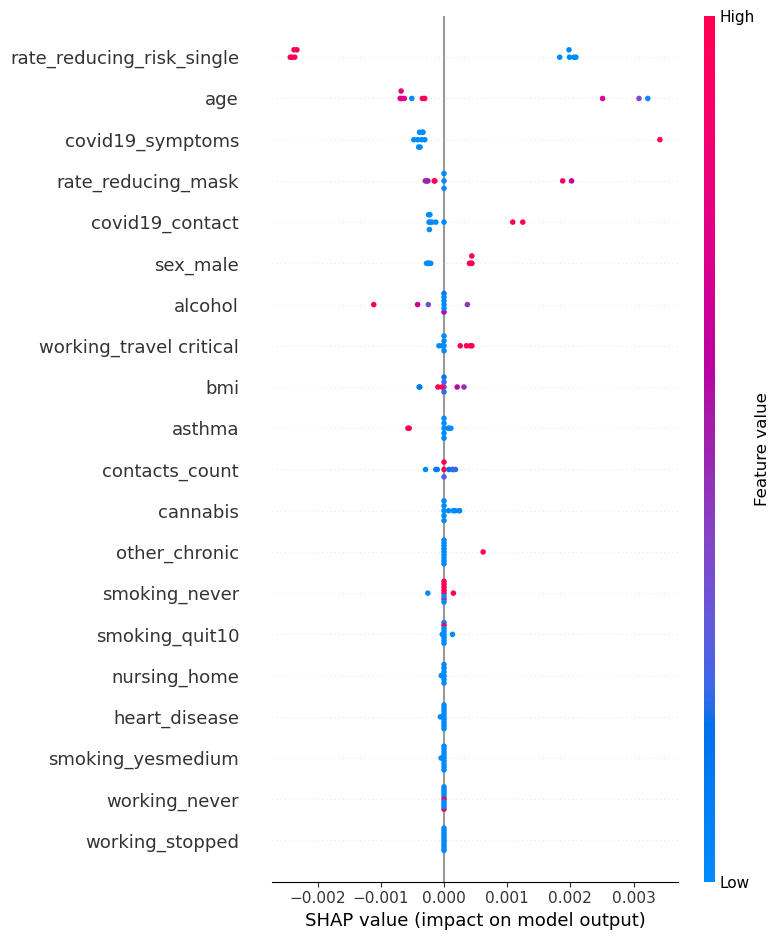

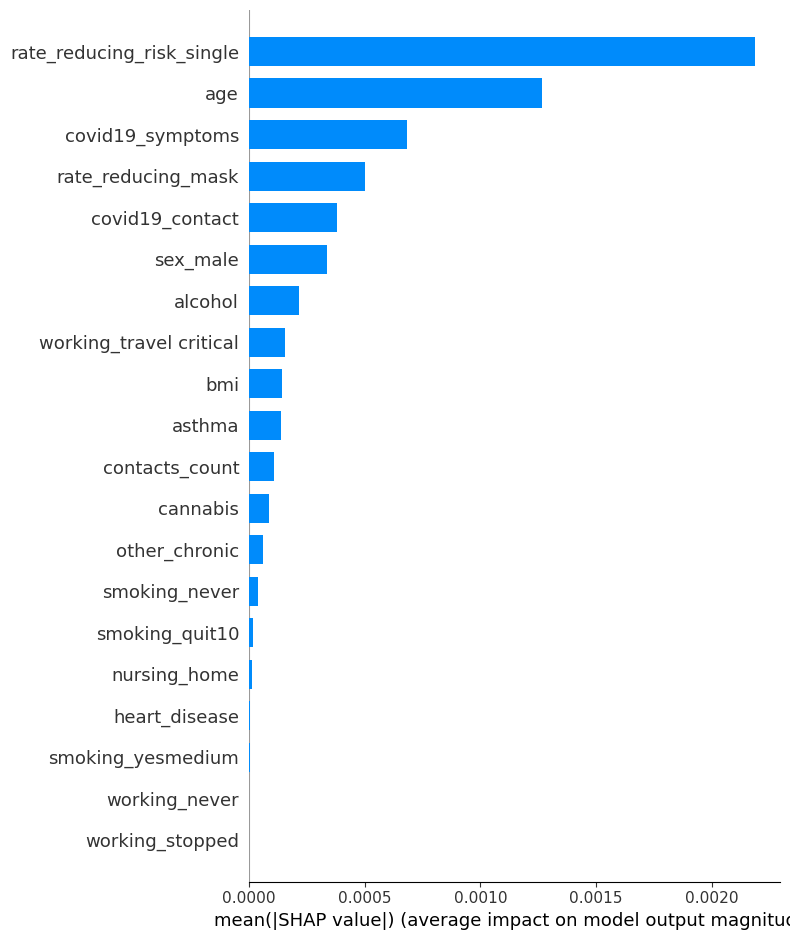

In [96]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Convert background data and validation sample to numpy arrays.
background_np = X_train_df[union_features].sample(100, random_state=42).values
X_val_sample_np = X_val_df[union_features].sample(10, random_state=42).values

# Define a wrapper that returns the probability for the positive class only.
def predict_proba_positive(X):
    X = np.atleast_2d(X)
    # Return probability for class 1 (positive class)
    return optimized_adaboost.predict_proba(X)[:, 1]

# Create KernelExplainer using the new wrapper.
explainer = shap.KernelExplainer(predict_proba_positive, background_np, vectorize=True)

# Compute SHAP values for the validation sample.
# For a single-output function, this returns an array of shape (n_samples, n_features).
shap_values = explainer.shap_values(X_val_sample_np, nsamples=100)

# Debug: Print shapes to confirm they match.
print("shap_values shape:", shap_values.shape)         # Expected: (10, 21)
print("X_val_sample_np shape:", X_val_sample_np.shape)     # Expected: (10, 21)

# -----------------------------------------------
# 1. Beeswarm Summary Plot: Displays the distribution of feature impacts.
shap.summary_plot(shap_values, X_val_sample_np, feature_names=union_features)
# plt.title("SHAP Summary Plot for AdaBoost (KernelExplainer)")
# plt.show()
plt.close()
# -----------------------------------------------
# 2. Bar Plot for Global Feature Importance: Shows average feature impact.
shap.summary_plot(shap_values, X_val_sample_np, plot_type="bar", feature_names=union_features)
# plt.title("SHAP Feature Importance (Bar Plot)")
# plt.show()
plt.close()
# -----------------------------------------------
# 3. Force Plot: Provides a detailed explanation for a single prediction.
observation = X_val_sample_np[0]
force_plot = shap.force_plot(explainer.expected_value, shap_values[0], observation, feature_names=union_features)
force_plot  # In Jupyter Notebook, this displays the interactive force plot.


## GA - HPO on all 4 algorithms till generation 10

In [97]:
import random
import numpy as np
from sklearn.metrics import accuracy_score

# =============================================================================
# Generic GA-HPO Function
# =============================================================================
def ga_hpo_model(evaluate_fn, random_individual_fn, crossover_fn, mutate_fn,
                 X_tr, y_tr, X_val, y_val, features,
                 population_size=20, generations=10):
    population = [random_individual_fn() for _ in range(population_size)]
    best_individual = None
    best_fitness = 0

    for gen in range(generations):
        fitness_scores = [evaluate_fn(ind, X_tr, y_tr, X_val, y_val, features)
                          for ind in population]
        print(f"Generation {gen+1} | Best fitness: {max(fitness_scores):.4f}")
        
        max_index = np.argmax(fitness_scores)
        if fitness_scores[max_index] > best_fitness:
            best_fitness = fitness_scores[max_index]
            best_individual = population[max_index]

        total_fitness = sum(fitness_scores)
        if total_fitness == 0:
            probabilities = [1/len(population)] * len(population)
        else:
            probabilities = [f/total_fitness for f in fitness_scores]
        selected = random.choices(population, weights=probabilities, k=population_size)
        
        next_generation = []
        for i in range(0, population_size, 2):
            parent1 = selected[i]
            parent2 = selected[(i+1) % population_size]
            child1 = mutate_fn(crossover_fn(parent1, parent2), mutation_rate=0.2)
            child2 = mutate_fn(crossover_fn(parent2, parent1), mutation_rate=0.2)
            next_generation.extend([child1, child2])
        population = next_generation[:population_size]
    
    print("Best hyperparameters found:", best_individual, "with validation accuracy:", best_fitness)
    return best_individual

# =============================================================================
# Shared Crossover and Mutation for 2-parameter models
# =============================================================================
def crossover_numeric(parent1, parent2):
    child = {}
    child["n_estimators"] = random.choice([parent1.get("n_estimators"), parent2.get("n_estimators")])
    child["learning_rate"] = round((parent1.get("learning_rate", 0) + parent2.get("learning_rate", 0)) / 2.0, 3)
    return child

def mutate_numeric(individual, mutation_rate=0.1):
    if "n_estimators" in individual and random.random() < mutation_rate:
        individual["n_estimators"] = random.randint(50, 200)
    if "learning_rate" in individual and random.random() < mutation_rate:
        individual["learning_rate"] = round(random.uniform(0.01, 1.0), 3)
    return individual

# =============================================================================
# 1. AdaBoost HPO (Optimizing n_estimators & learning_rate)
# =============================================================================
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

def random_individual_adaboost():
    return {
        "n_estimators": random.randint(50, 200),
        "learning_rate": round(random.uniform(0.01, 1.0), 3)
    }

def evaluate_individual_adaboost(individual, X_tr, y_tr, X_val, y_val, features):
    model = AdaBoostClassifier(
        n_estimators=individual["n_estimators"],
        learning_rate=individual["learning_rate"],
        random_state=42,
        estimator=DecisionTreeClassifier(max_depth=1, random_state=42)
    )
    model.fit(X_tr[features], y_tr)
    return accuracy_score(y_val, model.predict(X_val[features]))

print("\n--- GA-HPO for AdaBoost ---")
best_params_adaboost = ga_hpo_model(evaluate_individual_adaboost,
                                    random_individual_adaboost,
                                    crossover_numeric,
                                    mutate_numeric,
                                    X_train_df, y_train,
                                    X_val_df, y_val,
                                    union_features,
                                    population_size=20, generations=10)

# =============================================================================
# 2. Gradient Boosting HPO (Optimizing n_estimators & learning_rate)
# =============================================================================
from sklearn.ensemble import GradientBoostingClassifier

def random_individual_gb():
    return {
        "n_estimators": random.randint(50, 200),
        "learning_rate": round(random.uniform(0.01, 1.0), 3)
    }

def evaluate_individual_gb(individual, X_tr, y_tr, X_val, y_val, features):
    model = GradientBoostingClassifier(
        n_estimators=individual["n_estimators"],
        learning_rate=individual["learning_rate"],
        random_state=42
    )
    model.fit(X_tr[features], y_tr)
    return accuracy_score(y_val, model.predict(X_val[features]))

print("\n--- GA-HPO for Gradient Boosting ---")
best_params_gb = ga_hpo_model(evaluate_individual_gb,
                              random_individual_gb,
                              crossover_numeric,
                              mutate_numeric,
                              X_train_df, y_train,
                              X_val_df, y_val,
                              union_features,
                              population_size=20, generations=10)

# =============================================================================
# 3. Linear SVM HPO (Optimizing parameter C)
# =============================================================================
from sklearn.svm import LinearSVC

def random_individual_lsvm():
    return {"C": random.uniform(0.001, 100)}

def evaluate_individual_lsvm(individual, X_tr, y_tr, X_val, y_val, features):
    model = LinearSVC(C=individual["C"], random_state=42, max_iter=10000)
    model.fit(X_tr[features], y_tr)
    return accuracy_score(y_val, model.predict(X_val[features]))

def crossover_single(parent1, parent2):
    return {"C": (parent1["C"] + parent2["C"]) / 2.0}

def mutate_single(individual, mutation_rate=0.1):
    if random.random() < mutation_rate:
        individual["C"] = random.uniform(0.001, 100)
    return individual

print("\n--- GA-HPO for Linear SVM ---")
best_params_lsvm = ga_hpo_model(evaluate_individual_lsvm,
                                random_individual_lsvm,
                                crossover_single,
                                mutate_single,
                                X_train_df, y_train,
                                X_val_df, y_val,
                                union_features,
                                population_size=20, generations=10)

# =============================================================================
# 4. Logistic Regression HPO (Optimizing parameter C)
# =============================================================================
from sklearn.linear_model import LogisticRegression

def random_individual_logreg():
    return {"C": random.uniform(0.001, 100)}

def evaluate_individual_logreg(individual, X_tr, y_tr, X_val, y_val, features):
    model = LogisticRegression(C=individual["C"], random_state=42, max_iter=1000)
    model.fit(X_tr[features], y_tr)
    return accuracy_score(y_val, model.predict(X_val[features]))

print("\n--- GA-HPO for Logistic Regression ---")
best_params_logreg = ga_hpo_model(evaluate_individual_logreg,
                                  random_individual_logreg,
                                  crossover_single,
                                  mutate_single,
                                  X_train_df, y_train,
                                  X_val_df, y_val,
                                  union_features,
                                  population_size=20, generations=10)

# =============================================================================
# Final Model Training with Optimized Hyperparameters
# =============================================================================
# You can retrain each model on the full training (or training+validation) data and then evaluate on test data.
# Here are examples using the union_features subset:

# AdaBoost Final Model:
optimized_adaboost = AdaBoostClassifier(
    n_estimators=best_params_adaboost["n_estimators"],
    learning_rate=best_params_adaboost["learning_rate"],
    random_state=42,
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42)
)
optimized_adaboost.fit(X_train_df[union_features], y_train)
acc_adaboost = accuracy_score(y_test, optimized_adaboost.predict(X_test_df[union_features]))
print("\nFinal AdaBoost Test Accuracy:", acc_adaboost)

# Gradient Boosting Final Model:
optimized_gb = GradientBoostingClassifier(
    n_estimators=best_params_gb["n_estimators"],
    learning_rate=best_params_gb["learning_rate"],
    random_state=42
)
optimized_gb.fit(X_train_df[union_features], y_train)
acc_gb = accuracy_score(y_test, optimized_gb.predict(X_test_df[union_features]))
print("Final Gradient Boosting Test Accuracy:", acc_gb)

# Linear SVM Final Model:
optimized_lsvm = LinearSVC(C=best_params_lsvm["C"], random_state=42, max_iter=10000)
optimized_lsvm.fit(X_train_df[union_features], y_train)
acc_lsvm = accuracy_score(y_test, optimized_lsvm.predict(X_test_df[union_features]))
print("Final Linear SVM Test Accuracy:", acc_lsvm)

# Logistic Regression Final Model:
optimized_logreg = LogisticRegression(C=best_params_logreg["C"], random_state=42, max_iter=1000)
optimized_logreg.fit(X_train_df[union_features], y_train)
acc_logreg = accuracy_score(y_test, optimized_logreg.predict(X_test_df[union_features]))
print("Final Logistic Regression Test Accuracy:", acc_logreg)



--- GA-HPO for AdaBoost ---
Generation 1 | Best fitness: 0.9581
Generation 2 | Best fitness: 0.9529
Generation 3 | Best fitness: 0.9306
Generation 4 | Best fitness: 0.9572
Generation 5 | Best fitness: 0.9448
Generation 6 | Best fitness: 0.9565
Generation 7 | Best fitness: 0.9608
Generation 8 | Best fitness: 0.9552
Generation 9 | Best fitness: 0.9542
Generation 10 | Best fitness: 0.9552
Best hyperparameters found: {'n_estimators': 184, 'learning_rate': 0.978} with validation accuracy: 0.9608407374994438

--- GA-HPO for Gradient Boosting ---
Generation 1 | Best fitness: 0.9906
Generation 2 | Best fitness: 0.9906
Generation 3 | Best fitness: 0.9907
Generation 4 | Best fitness: 0.9907
Generation 5 | Best fitness: 0.9904
Generation 6 | Best fitness: 0.9907
Generation 7 | Best fitness: 0.9903
Generation 8 | Best fitness: 0.9904
Generation 9 | Best fitness: 0.9904
Generation 10 | Best fitness: 0.9901
Best hyperparameters found: {'n_estimators': 188, 'learning_rate': 0.883} with validation ac

## SHAP analysis on all 4 models after GA-HPO

  0%|          | 0/10 [00:00<?, ?it/s]

AdaBoost - shap_values shape: (10, 21)
AdaBoost - X_val_sample_np shape: (10, 21)


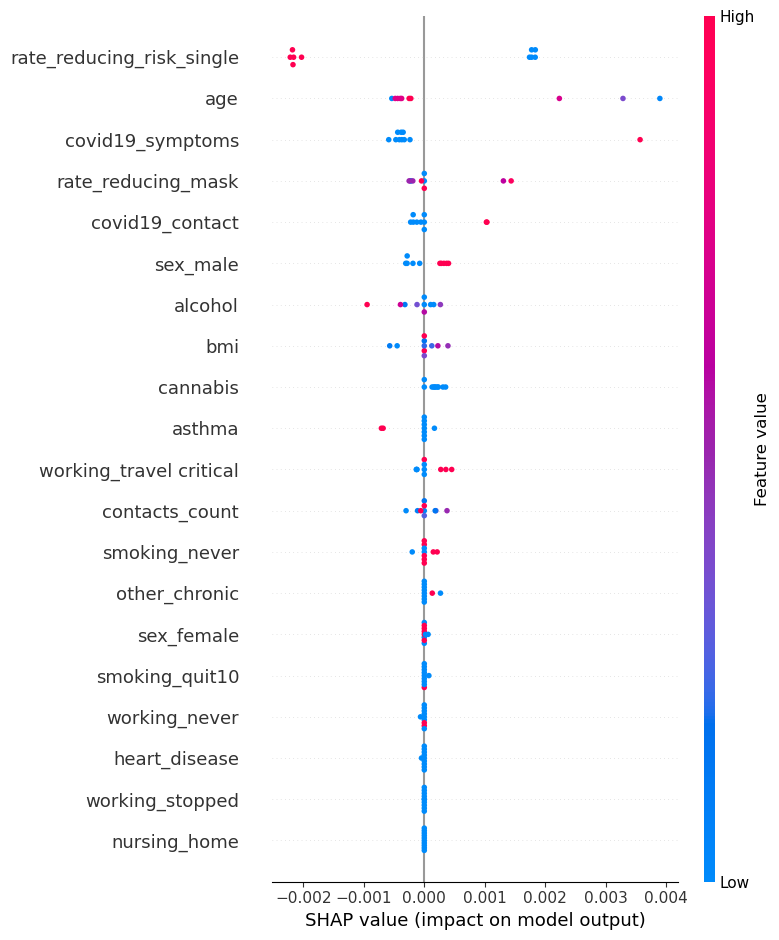

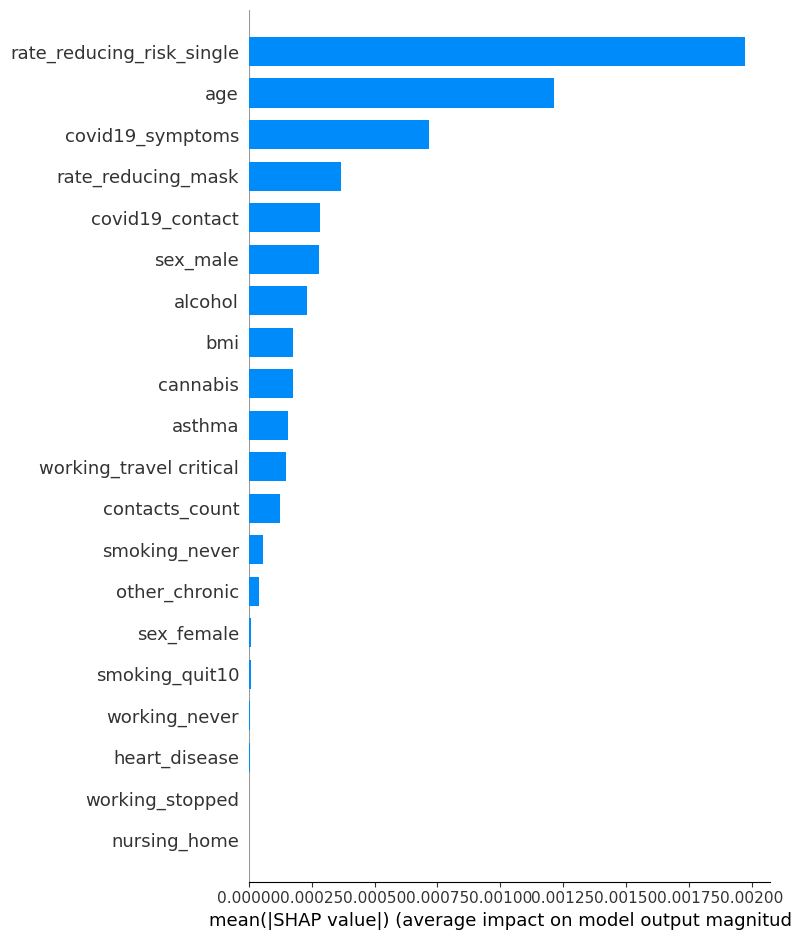

  0%|          | 0/10 [00:00<?, ?it/s]

Gradient Boosting - shap_values shape: (10, 21)
Gradient Boosting - X_val_sample_np shape: (10, 21)


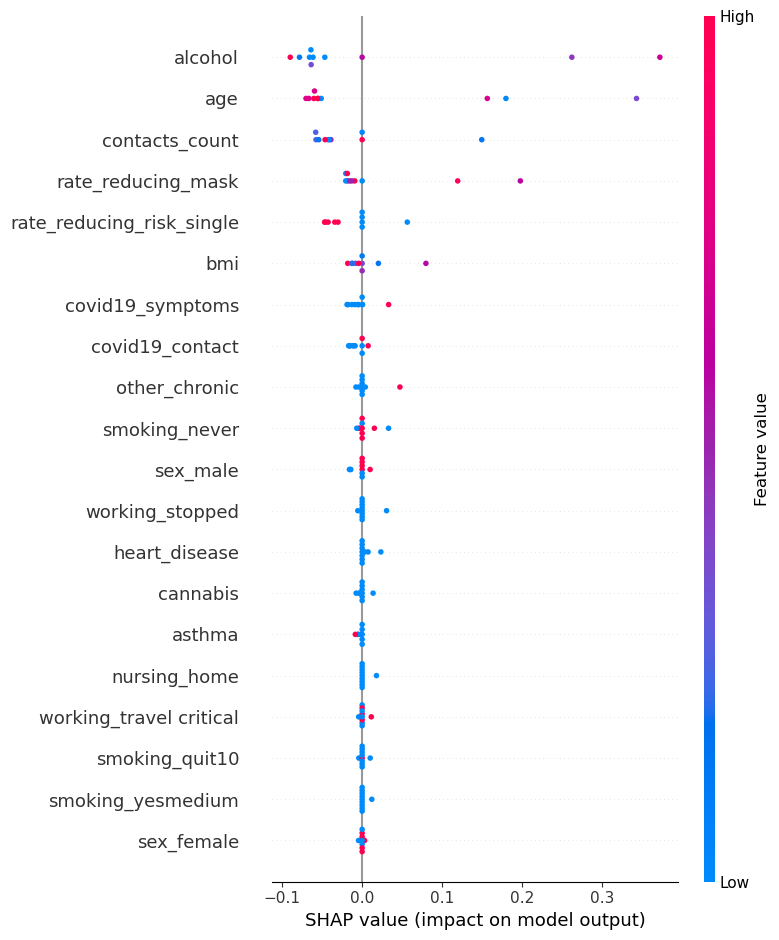

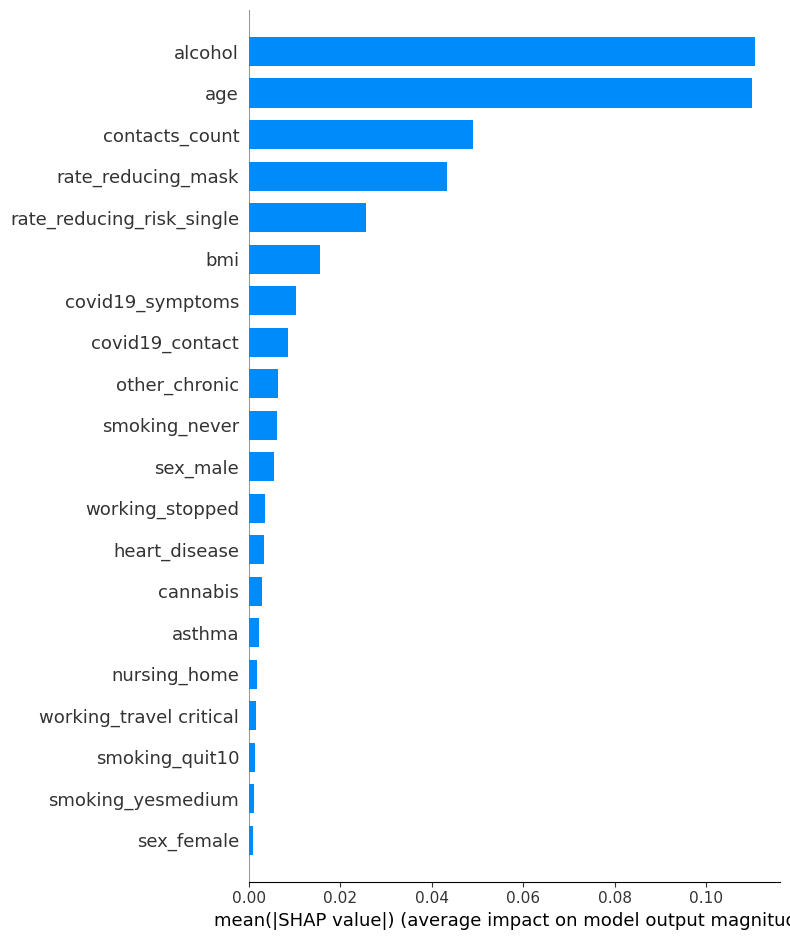

  0%|          | 0/10 [00:00<?, ?it/s]

Linear SVM - shap_values shape: (10, 21)
Linear SVM - X_val_sample_np shape: (10, 21)


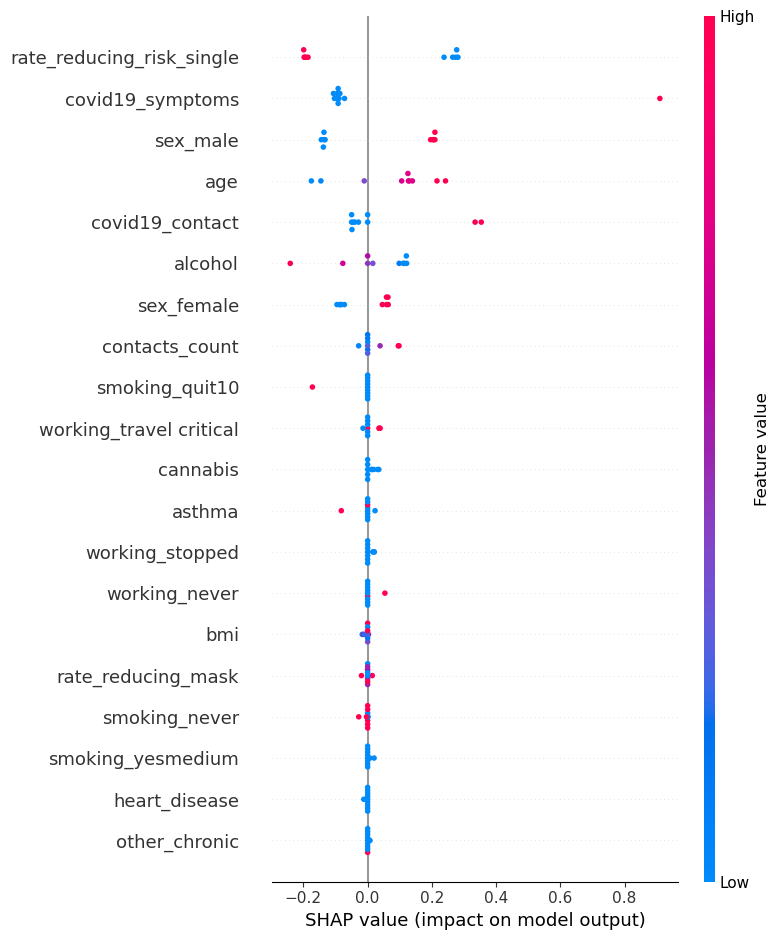

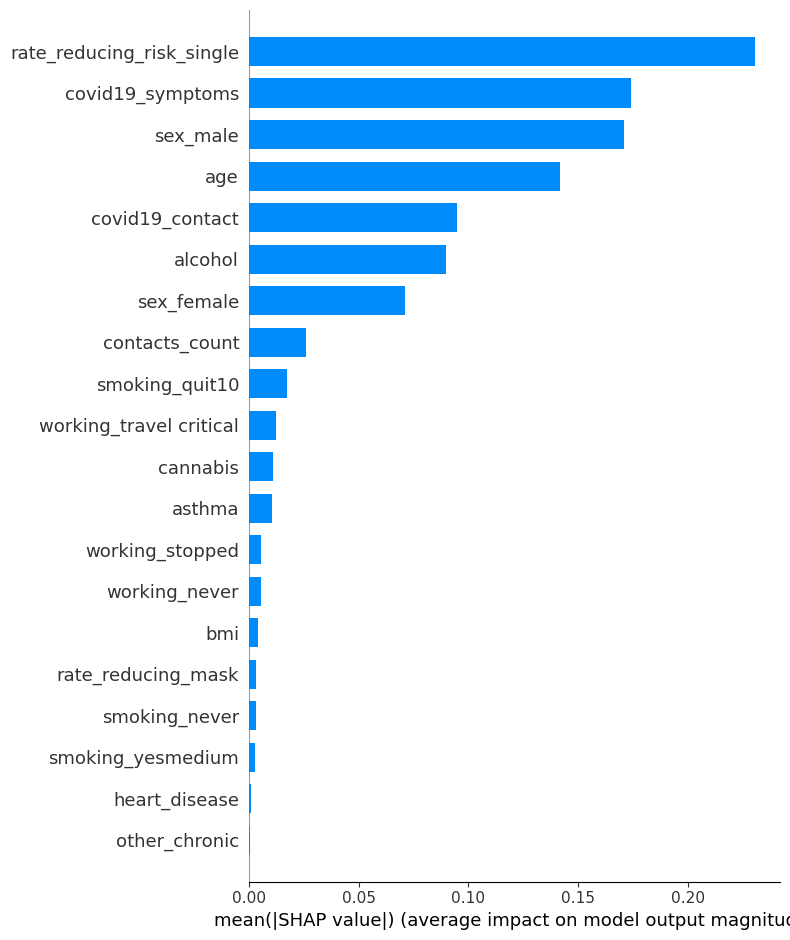

  0%|          | 0/10 [00:00<?, ?it/s]

Logistic Regression - shap_values shape: (10, 21)
Logistic Regression - X_val_sample_np shape: (10, 21)


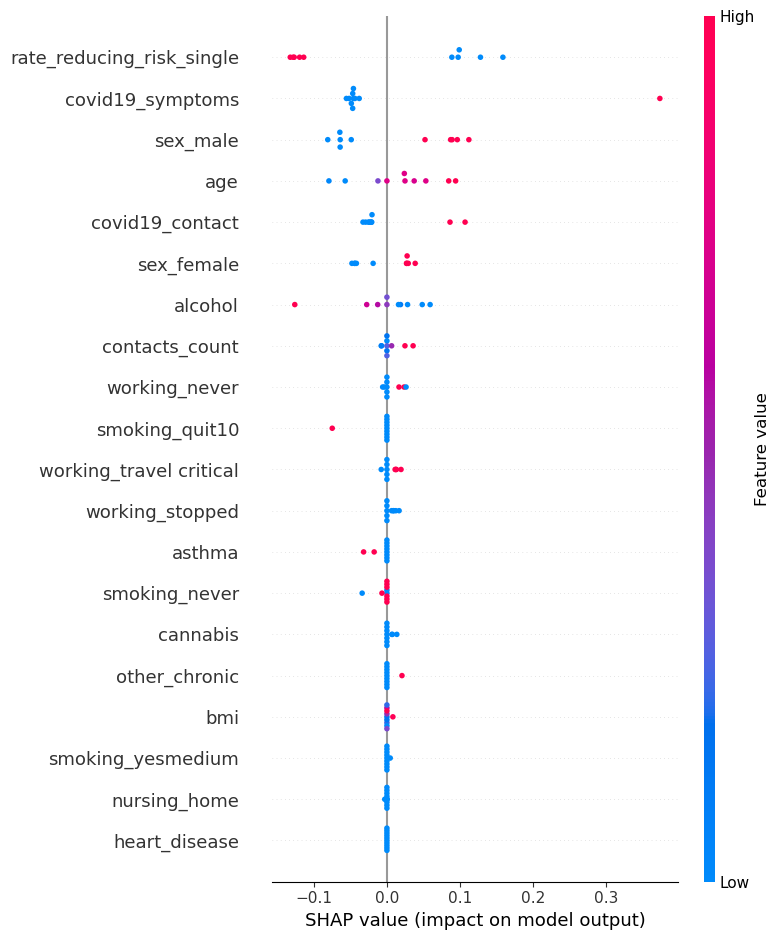

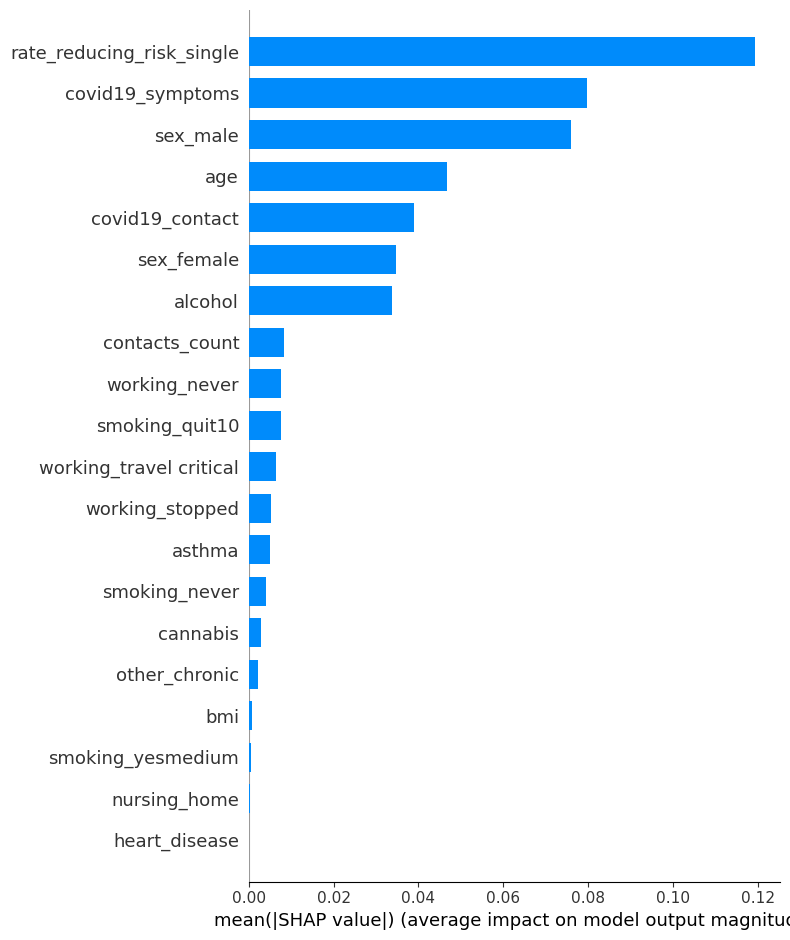

In [104]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Convert background data and validation sample to numpy arrays.
background_np = X_train_df[union_features].sample(100, random_state=42).values
X_val_sample_np = X_val_df[union_features].sample(10, random_state=42).values

def run_shap_analysis(model, model_name, model_type="proba"):
    """
    Run SHAP analysis using KernelExplainer for a given model.
    
    Parameters:
      - model: The model to explain.
      - model_name: A string label for the model.
      - model_type: "proba" for models with predict_proba and "decision" for models with decision_function.
    
    This function computes the SHAP values on X_val_sample_np, then produces:
      1. Beeswarm summary plot.
      2. Bar plot for global feature importance.
      3. Force plot for a single observation.
    """
    # Define a wrapper function based on model type.
    if model_type == "proba":
        def model_wrapper(X):
            X = np.atleast_2d(X)
            return model.predict_proba(X)[:, 1]  # Probability for the positive class.
    else:  # For models like Linear SVM using decision_function.
        def model_wrapper(X):
            X = np.atleast_2d(X)
            return model.decision_function(X)
    
    # Create the KernelExplainer.
    explainer = shap.KernelExplainer(model_wrapper, background_np, vectorize=True)
    # Compute SHAP values.
    shap_values = explainer.shap_values(X_val_sample_np, nsamples=100)
    
    # Debug prints.
    print(f"{model_name} - shap_values shape:", shap_values.shape)
    print(f"{model_name} - X_val_sample_np shape:", X_val_sample_np.shape)
    
    # 1. Beeswarm Summary Plot: Distribution of feature impacts.
    shap.summary_plot(shap_values, X_val_sample_np, feature_names=union_features)
    plt.close()
    
    # 2. Bar Plot for Global Feature Importance.
    shap.summary_plot(shap_values, X_val_sample_np, plot_type="bar", feature_names=union_features)
    plt.close()
    
    # 3. Force Plot for a single observation.
    observation = X_val_sample_np[0]
    force_plot = shap.force_plot(explainer.expected_value, shap_values[0], observation, feature_names=union_features)
    return force_plot

# Run analysis for each model:

# 1. AdaBoost
force_plot_adaboost = run_shap_analysis(optimized_adaboost, "AdaBoost", model_type="proba")
force_plot_adaboost  # Display in Jupyter Notebook

# 2. Gradient Boosting
force_plot_gb = run_shap_analysis(optimized_gb, "Gradient Boosting", model_type="proba")
force_plot_gb  # Display in Jupyter Notebook

# 3. Linear SVM (using decision_function)
force_plot_lsvm = run_shap_analysis(optimized_lsvm, "Linear SVM", model_type="decision")
force_plot_lsvm  # Display in Jupyter Notebook

# 4. Logistic Regression
force_plot_logreg = run_shap_analysis(optimized_logreg, "Logistic Regression", model_type="proba")
force_plot_logreg  # Display in Jupyter Notebook
